In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("D:\Downloads\Add_sales_data_2018.csv")


In [3]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [5]:
data.shape

(205, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [7]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [8]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [9]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.


In [10]:
freqgraph.hist(figsize=(20,15))
plt.show()


NameError: name 'freqgraph' is not defined

<AxesSubplot:>

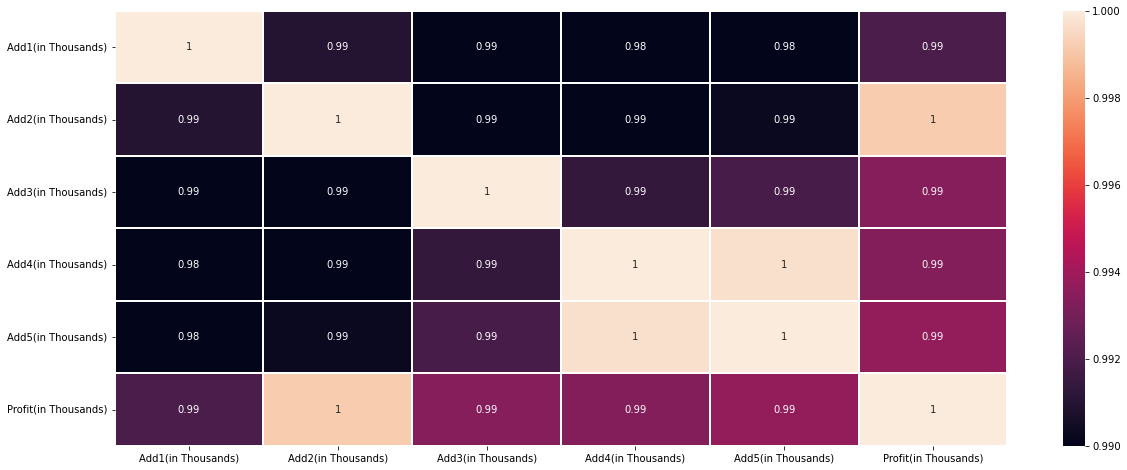

In [11]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=.99,vmax=1,annot = True,linewidth=.2)

# 2.Build a regression model to predict the profit from the given data and comment your findings on it.

In [12]:
df = data.drop(['Add4(in Thousands)'],axis=1)
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [13]:
Y=df['Profit(in Thousands)']
X=df[['Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)']]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.25)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(Y_test,predictions))

MSE is: 6.8401473730346515e-25


In [16]:
from sklearn.metrics import r2_score as r2
print(r2(Y_test,predictions))

1.0


The  r² value of 1  indicates perfect fit. Based on the money spent on various commercials, the model we built is fairly good at predicting future profit outcomes.

# 3.Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [17]:
lr.predict([[290,312,309,298,320]]).item()

319.99999999999613

In [18]:
input=[[290,312,309,298,320]]
output=model.predict(input)
print(output)

[320.]
